<a href="https://colab.research.google.com/github/anupbagale/color_map/blob/main/look_up_table_color_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [104]:
image_path = '/content/drive/MyDrive/OASIS3_Dataset_Part4-20240506T062954Z-001/OASIS3_Dataset_Part4/Image_Folder/OAS30101_MR_d0101_anat3.nii.gz'
label_file = '/content/drive/MyDrive/OASIS3_Dataset_Part4-20240506T062954Z-001/OASIS3_Dataset_Part4/Label_Folder/OAS30101_MR_d0101.nii.gz'
colormap_path = '/content/drive/MyDrive/FreeSurferColorLUT.txt'

In [105]:
img_data = nib.load(image_path).get_fdata()
label_data = nib.load(label_file).get_fdata()

In [106]:
##heck if the image and its segment are consistent or not
if img_data.shape != label_data.shape:
    print(f"Shape mismatch: img_data.shape = {img_data.shape}, label_data.shape = {label_data.shape}")
else:
    print(f"Shapes are consistent: {img_data.shape}")


Shapes are consistent: (256, 256, 256)


In [107]:
#Extract the unique labels
unique_labels = np.unique(label_data)
print(f"Unique label values: {unique_labels}")

Unique label values: [  0.   2.   3.   4.   5.   7.   8.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  24.  26.  28.  30.  31.  41.  42.  43.  44.  46.  47.  49.
  50.  51.  52.  53.  54.  58.  60.  62.  63.  77.  80.  85. 251. 252.
 253. 254. 255.]


In [108]:
#Create the numpy array using the unique label values
STD_LABEL_VALUES = np.array([0, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 28, 30, 31, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 58, 60, 62, 63, 77, 80, 85, 251, 252, 253, 254, 255])
data = np.loadtxt(colormap_path, dtype=str)
label_index = data[:, 0].astype(np.int16)
label_cmap = data[:, 2:5].astype(np.int16) / 255
cmap_array = np.zeros((len(STD_LABEL_VALUES), 3))

for i, label in zip(range(len(STD_LABEL_VALUES)), STD_LABEL_VALUES):
    Loc = np.where(label_index == label)[0][0]
    cmap_array[i] = label_cmap[Loc]

In [109]:
#Function to replace label indices with corresponding colormap indices
def Replace_FS_Index(label_data):
    for items in STD_LABEL_VALUES:
        label_data[label_data == items] = np.where(STD_LABEL_VALUES == items)[0][0]
    return label_data

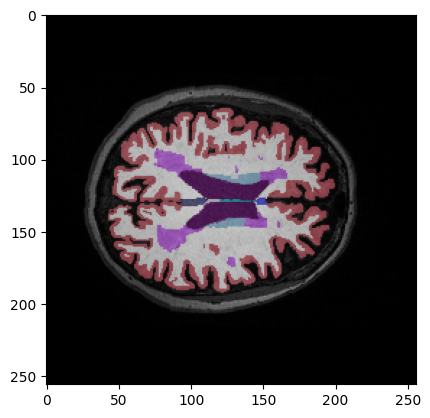

In [110]:
#plot
img_data=nib.load(image_path).get_fdata()
label_data=nib.load(label_file).get_fdata()
mod_label_data=Replace_FS_Index(label_data)
colored_label_data=cmap_array[mod_label_data.astype(np.int16)]
plt.imshow(img_data[:,110,:],cmap='gray')
plt.imshow(colored_label_data[:,110,:],alpha=0.5)
plt.show()